# Data Comparison Visualization

This notebook compares datasets across all timesteps and identifies differences.

In [1]:
# Parameters (injected by papermill)
ref_file = ""
new_file = ""
variables = ["ffmc", "dmc", "dc", "isi", "bui", "fwi"]
shapefile_path = "../shp/ecos.shp"
qc_utils_path = ""  # Path to qc_utils.py directory

In [2]:
# Parameters
variables = ["ffmc", "dmc", "dc", "isi", "bui", "fwi"]
ref_file = "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/cffdrs/era5/cffdrs_era5_1985.nc"
new_file = "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_shpmask_hursmin_clip/cffdrs/era5/cffdrs_era5_1985.nc"
shapefile_path = "shp/ecos.shp"
qc_utils_path = "/import/home/jdpaul3/boreal_fire_weather/processing/qc"


In [3]:
import sys
import warnings

# Add qc_utils path to Python path
if qc_utils_path and qc_utils_path not in sys.path:
    sys.path.insert(0, qc_utils_path)

from qc_utils import (
    load_datasets_and_shapefile,
    run_comparison_analysis,
    display_summary_tables,
    plot_max_value_differences,
    plot_max_nan_differences,
    generate_qc_summary,
)

warnings.filterwarnings("ignore")

print(f"Reference file: {ref_file}")
print(f"New file: {new_file}")
print(f"Variables to compare: {variables}")

Reference file: /import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/cffdrs/era5/cffdrs_era5_1985.nc
New file: /import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_shpmask_hursmin_clip/cffdrs/era5/cffdrs_era5_1985.nc
Variables to compare: ['ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi']


In [4]:
ds_ref, ds_new, gdf, bounds = load_datasets_and_shapefile(
    ref_file, new_file, shapefile_path
)

Loading datasets...
Shapefile bounds: [-163.89285272   47.55902851  -55.58034561   69.00630609]
Dataset reference shape: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 178, 'lon': 569})
Dataset new shape: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 178, 'lon': 569})
Number of timesteps: 365


## Timestep-by-Timestep Comparison

Comparing all timesteps to identify where differences occur.

In [5]:
comparison_results = run_comparison_analysis(ds_ref, ds_new, variables)

Comparing all timesteps...

Analyzing FFMC...


  Total timesteps: 365
  Timesteps with differences: 365
  Max absolute difference: 0.000059
  Max NaN changes: 0

Analyzing DMC...


  Total timesteps: 365
  Timesteps with differences: 217
  Max absolute difference: 0.000031
  Max NaN changes: 0

Analyzing DC...


  Total timesteps: 365
  Timesteps with differences: 343
  Max absolute difference: 0.000061
  Max NaN changes: 0

Analyzing ISI...


  Total timesteps: 365
  Timesteps with differences: 365
  Max absolute difference: 0.000061
  Max NaN changes: 0

Analyzing BUI...


  Total timesteps: 365
  Timesteps with differences: 219
  Max absolute difference: 0.000035
  Max NaN changes: 0

Analyzing FWI...


  Total timesteps: 365
  Timesteps with differences: 365
  Max absolute difference: 0.000076
  Max NaN changes: 0

Comparison complete!


## Summary Statistics for Differing Timesteps

Tables showing summary statistics for each timestep where differences were detected.

In [6]:
display_summary_tables(comparison_results, variables)


FFMC - Timesteps with Differences
      Date  Mean (Ref)  Std (Ref)  Mean (New)  Std (New)  Max Abs Diff  Value Diffs  NaN Changes
1985-01-01   71.052002  16.788000   71.052002  16.788000           0.0        11731            0
1985-01-02   66.446999  18.226000   66.446999  18.226000           0.0        17356            0
1985-01-03   64.334999  17.875999   64.334999  17.875999           0.0        19555            0
1985-01-04   63.206001  17.830999   63.206001  17.830999           0.0        21127            0
1985-01-05   62.534000  17.436001   62.534000  17.436001           0.0        21923            0
1985-01-06   61.060001  17.377001   61.060001  17.377001           0.0        23613            0
1985-01-07   60.539001  16.590000   60.539001  16.590000           0.0        23698            0
1985-01-08   60.082001  16.197001   60.082001  16.197001           0.0        24710            0
1985-01-09   60.081001  15.370000   60.081001  15.370000           0.0        25174         

## Visualization: Maximum Value Difference

Plotting the timestep with the greatest maximum absolute difference in values.


FFMC: Plotting timestep with maximum value difference
  Time: 1985-01-01 00:00:00
  Max absolute difference: 0.000059



DMC: Plotting timestep with maximum value difference
  Time: 1985-01-01 00:00:00
  Max absolute difference: 0.000031



DC: Plotting timestep with maximum value difference
  Time: 1985-06-27 00:00:00
  Max absolute difference: 0.000061



ISI: Plotting timestep with maximum value difference
  Time: 1985-11-25 00:00:00
  Max absolute difference: 0.000061



BUI: Plotting timestep with maximum value difference
  Time: 1985-05-12 00:00:00
  Max absolute difference: 0.000035



FWI: Plotting timestep with maximum value difference
  Time: 1985-01-09 00:00:00
  Max absolute difference: 0.000076


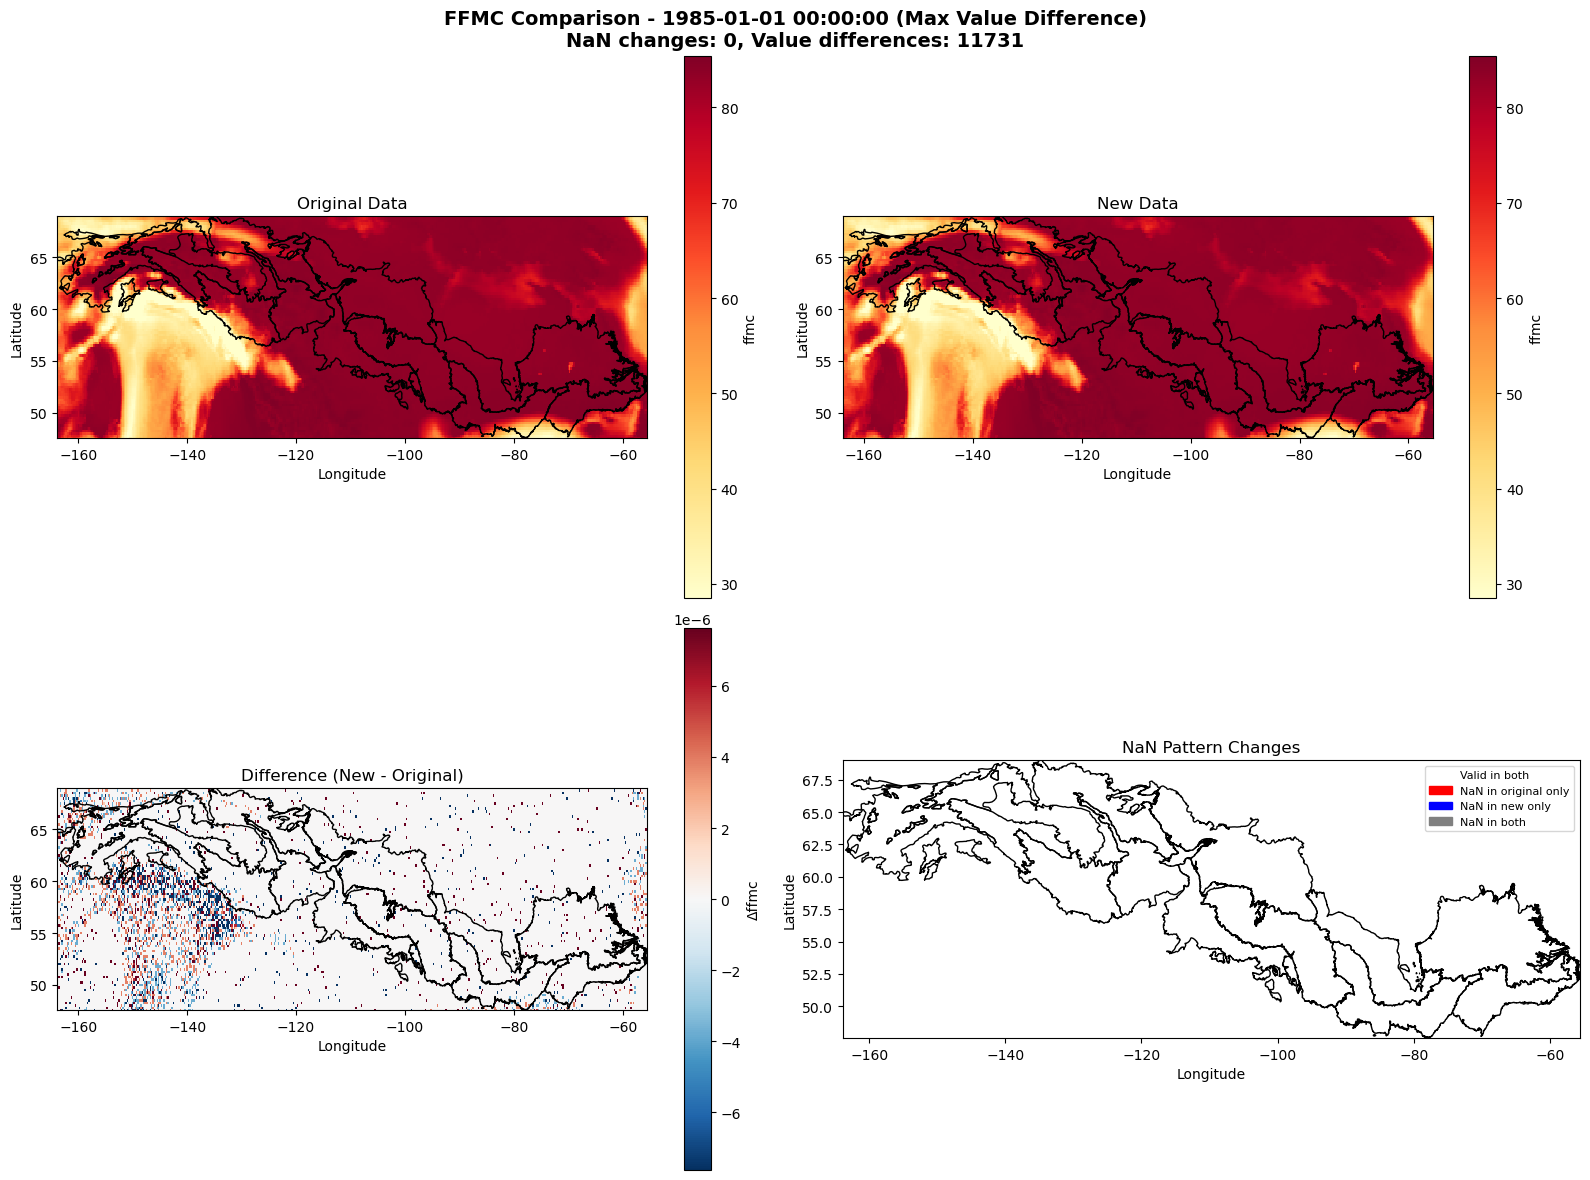

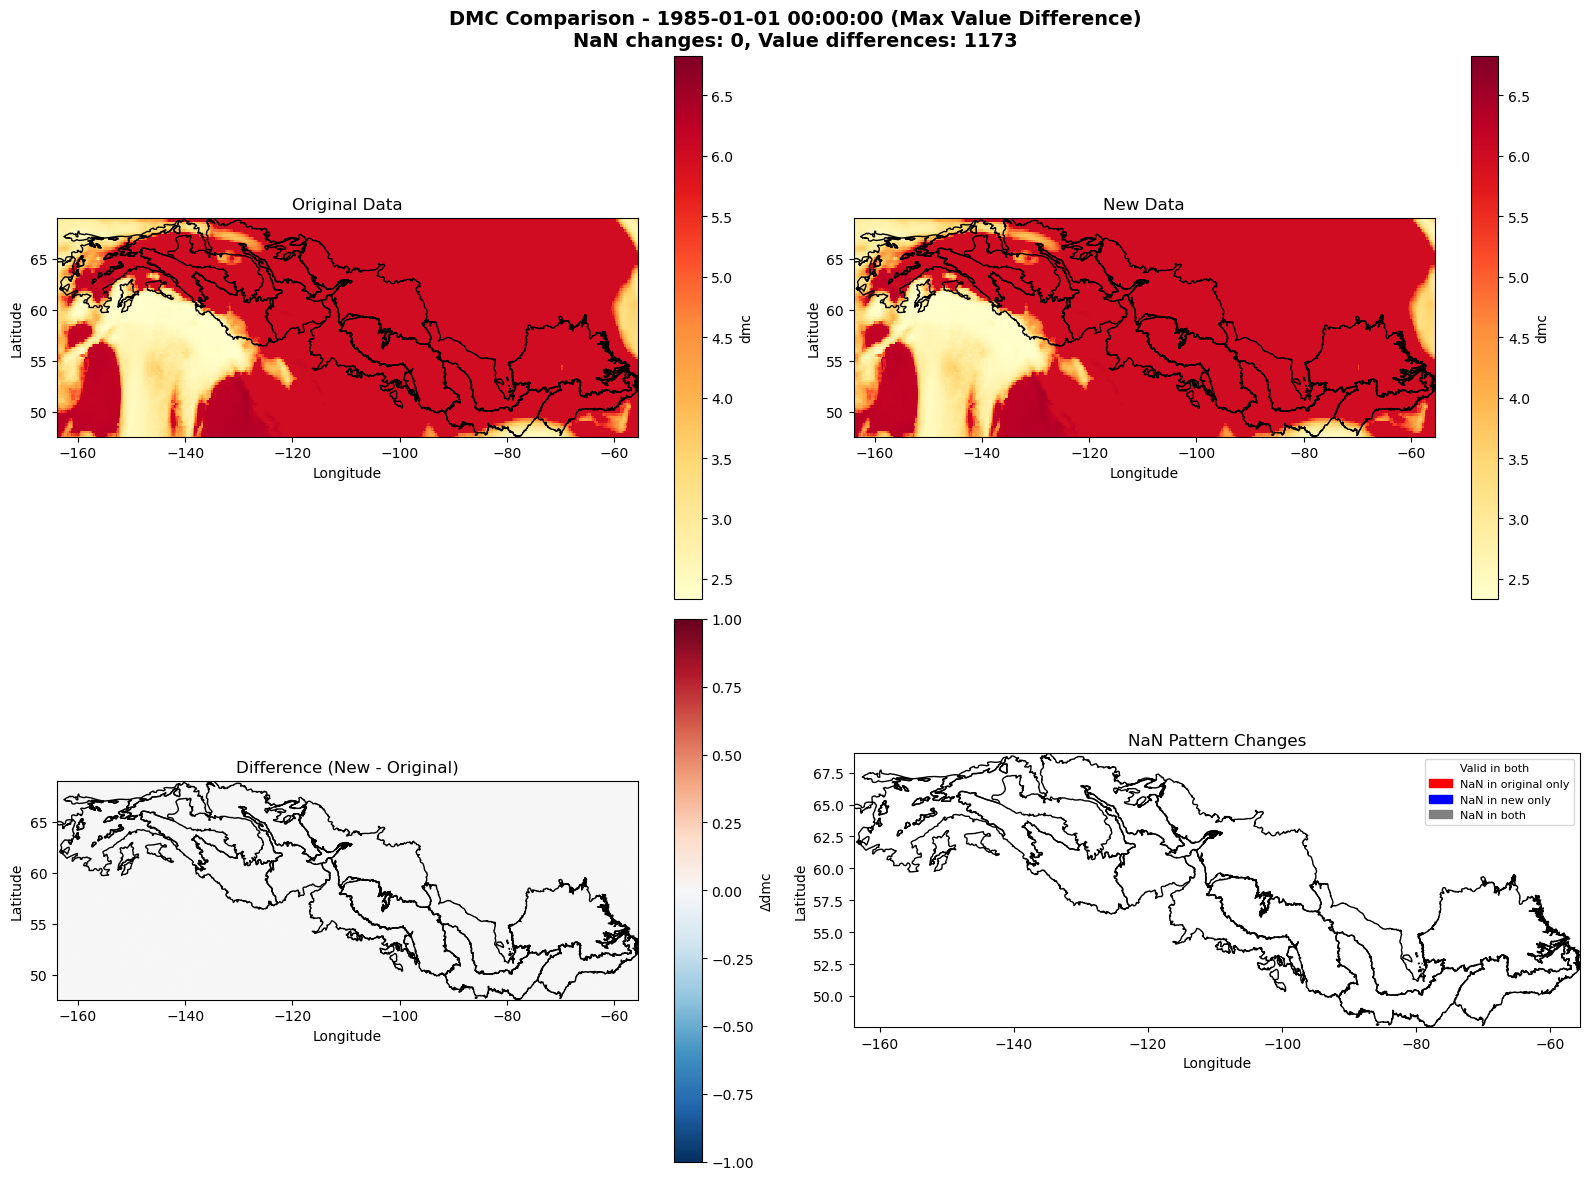

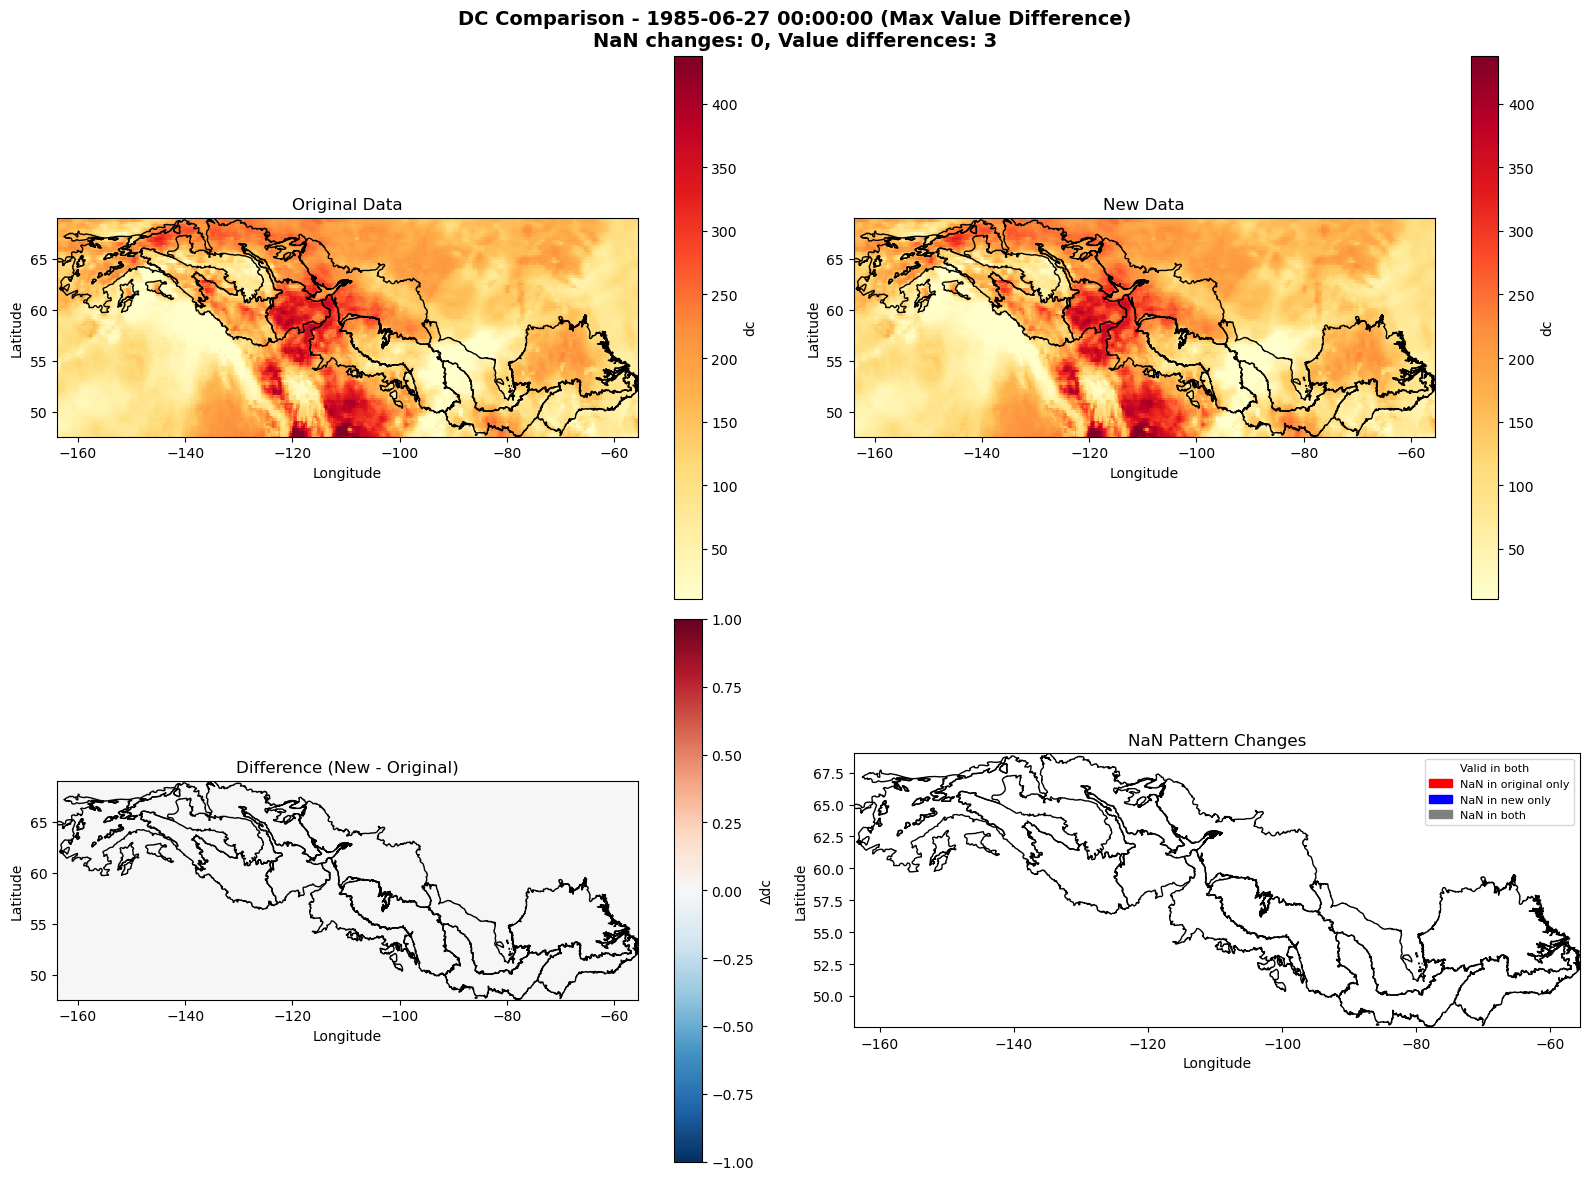

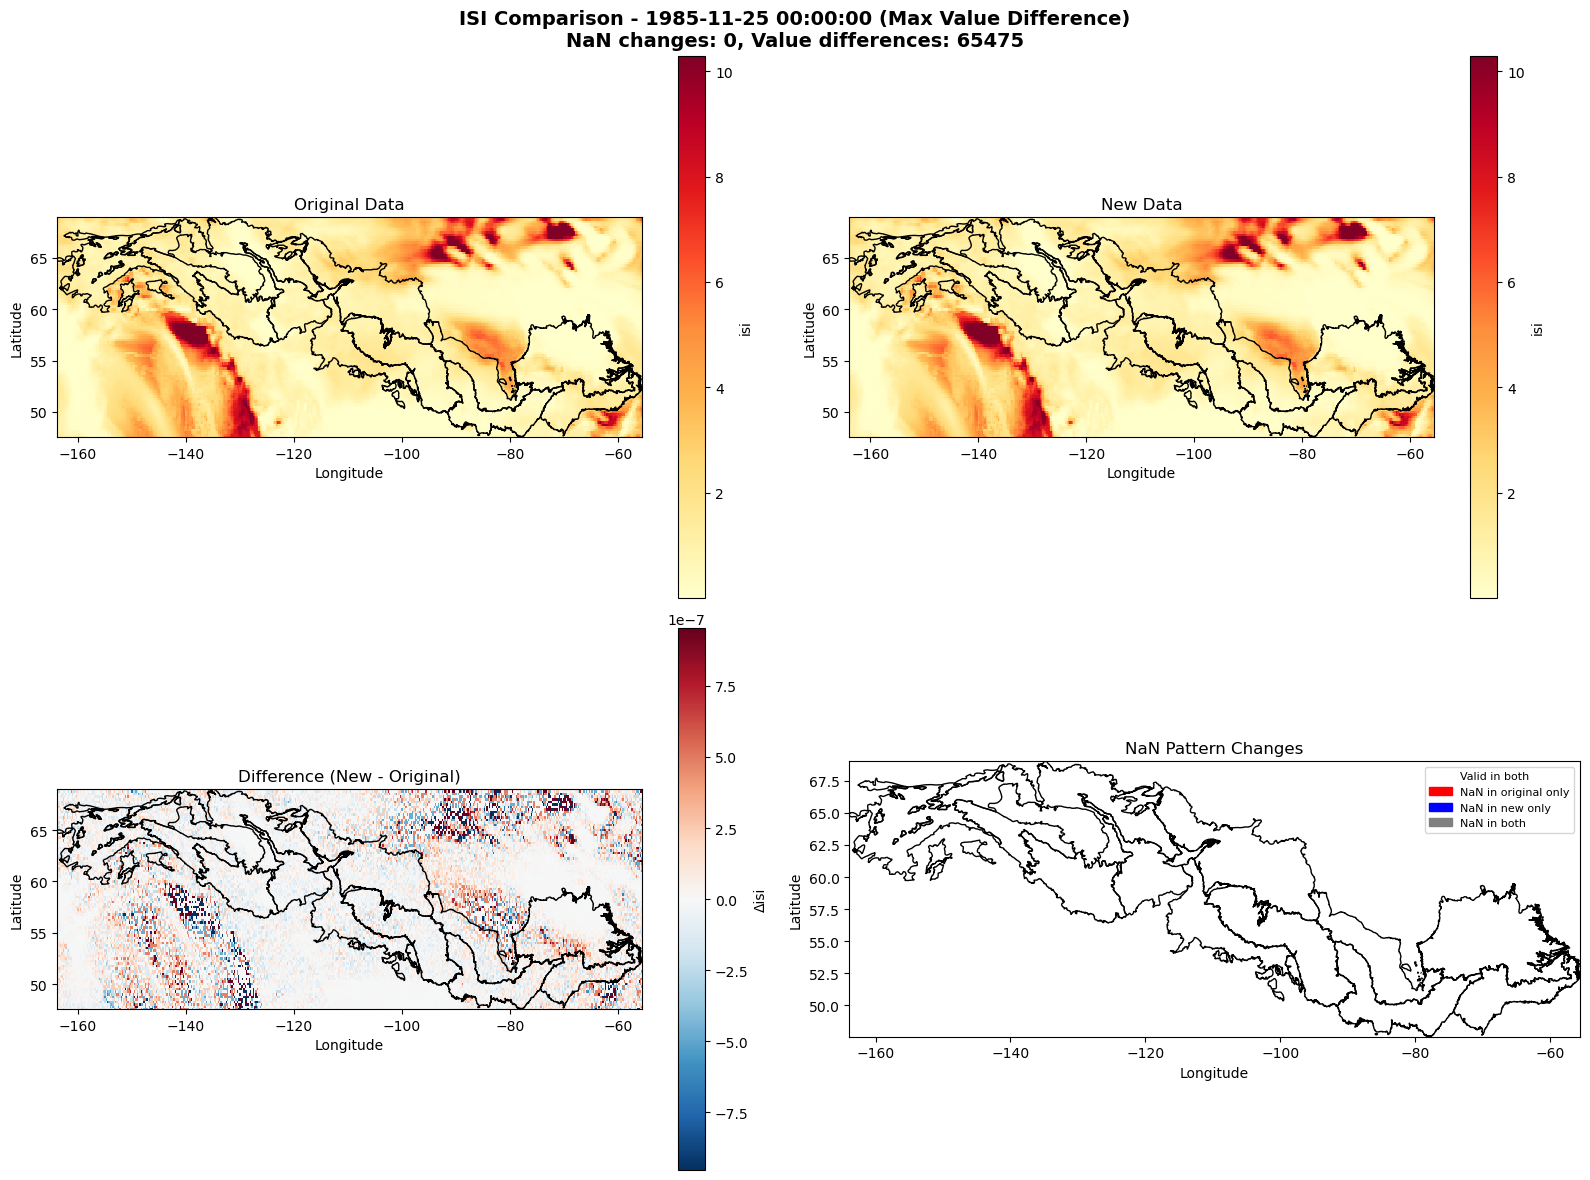

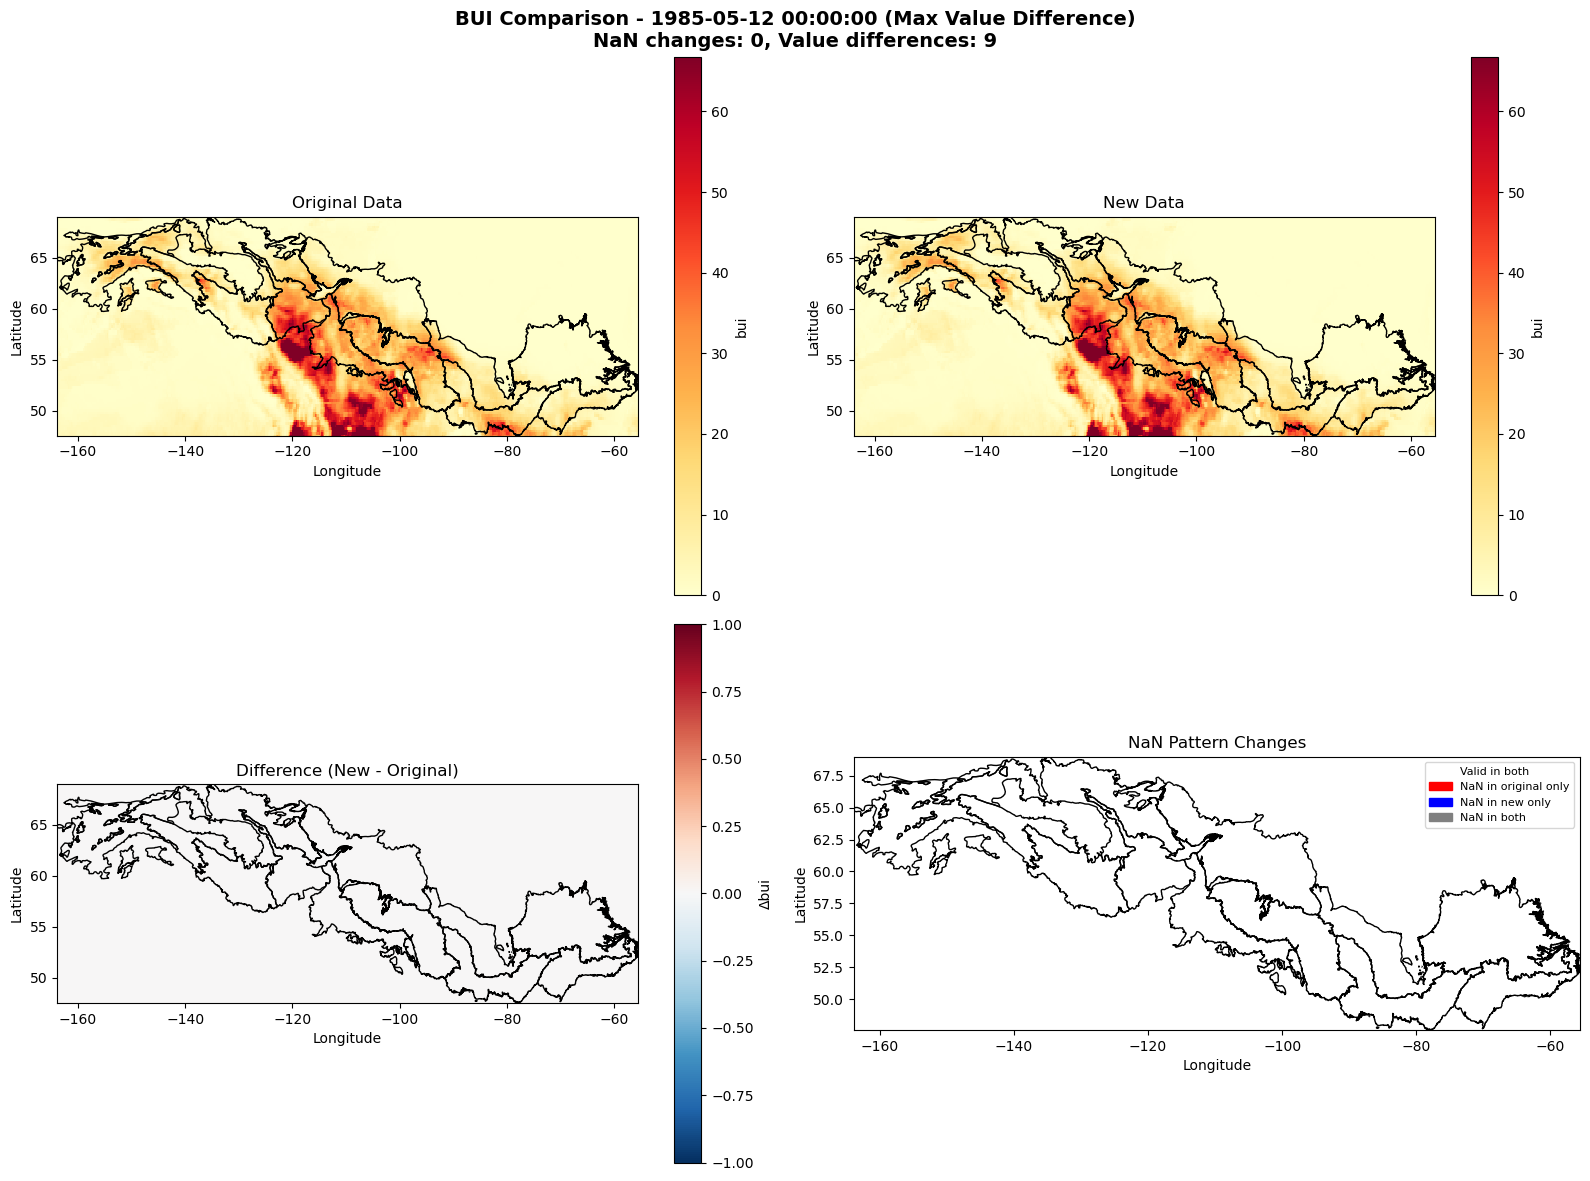

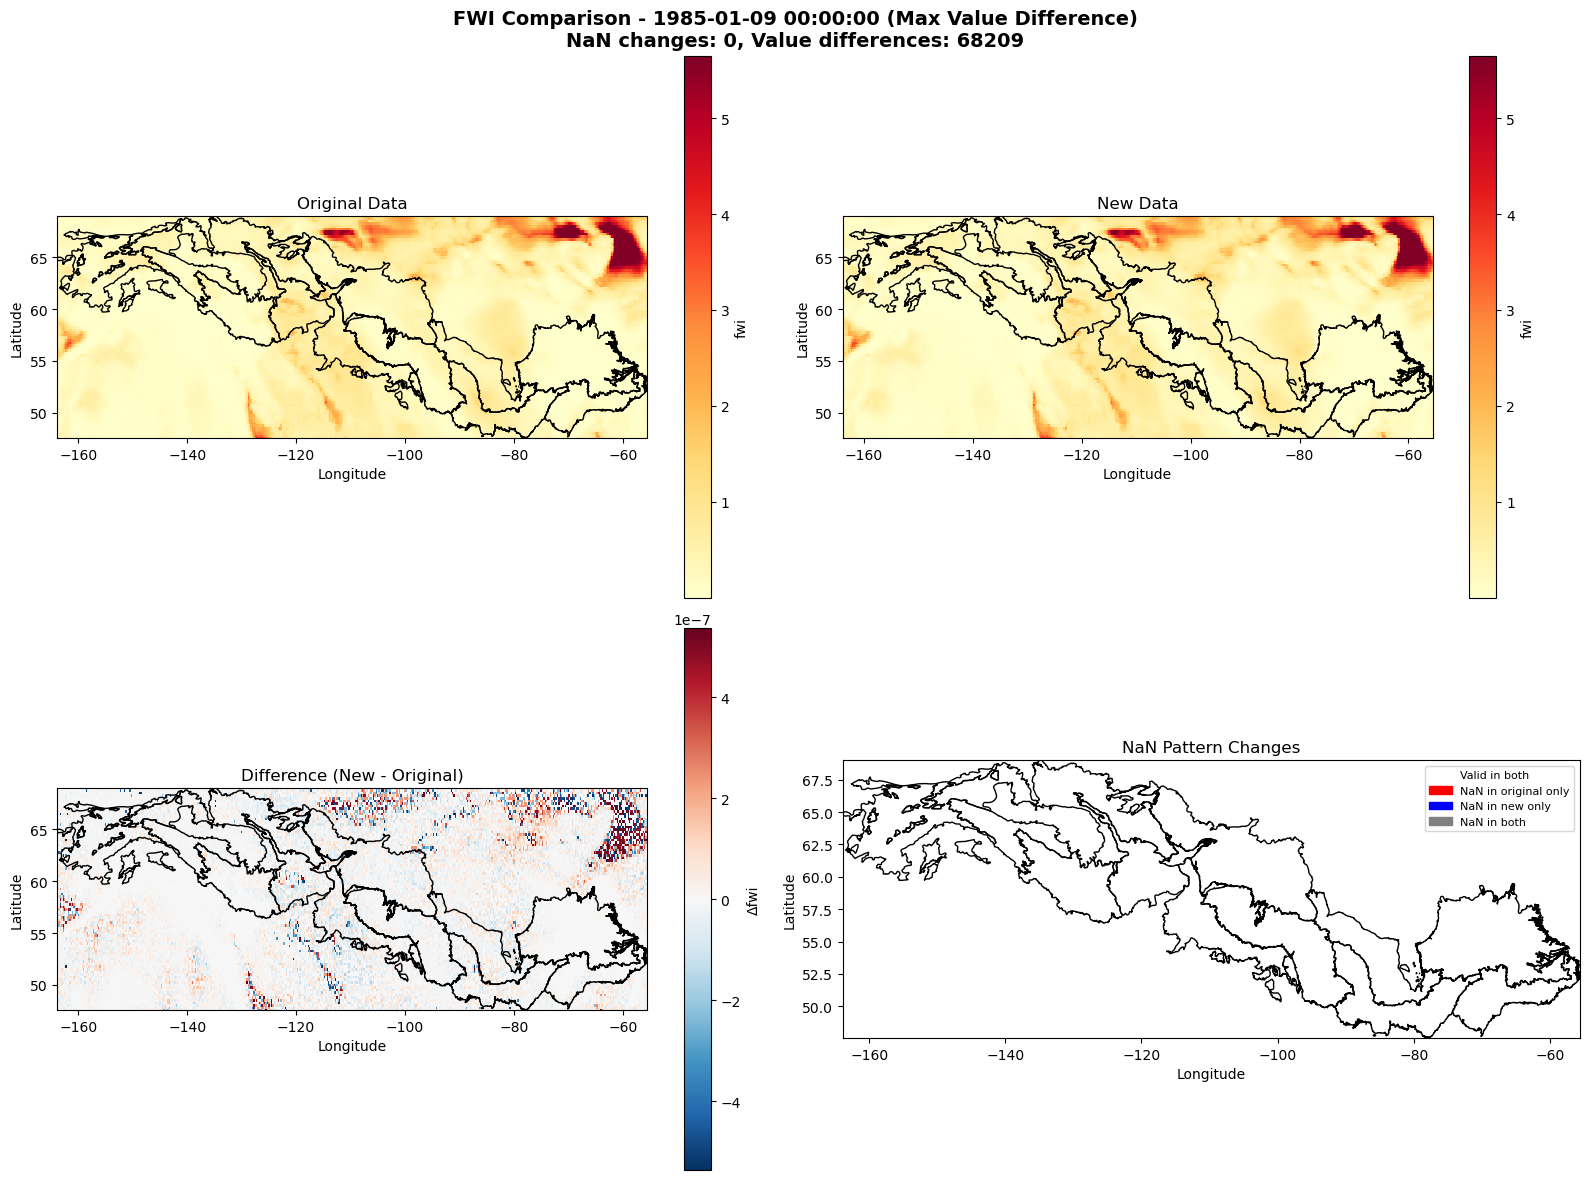

In [7]:
plot_max_value_differences(ds_ref, ds_new, comparison_results, variables, gdf, bounds)

## Visualization: Maximum NaN Pattern Difference

Plotting the timestep with the greatest number of NaN pattern changes.


FFMC: Max NaN changes occur at same timestep as max value difference

DMC: Max NaN changes occur at same timestep as max value difference

DC: Plotting timestep with maximum NaN changes
  Time: 1985-01-01 00:00:00
  NaN changes: 0



ISI: Plotting timestep with maximum NaN changes
  Time: 1985-01-01 00:00:00
  NaN changes: 0



BUI: Plotting timestep with maximum NaN changes
  Time: 1985-01-01 00:00:00
  NaN changes: 0



FWI: Plotting timestep with maximum NaN changes
  Time: 1985-01-01 00:00:00
  NaN changes: 0


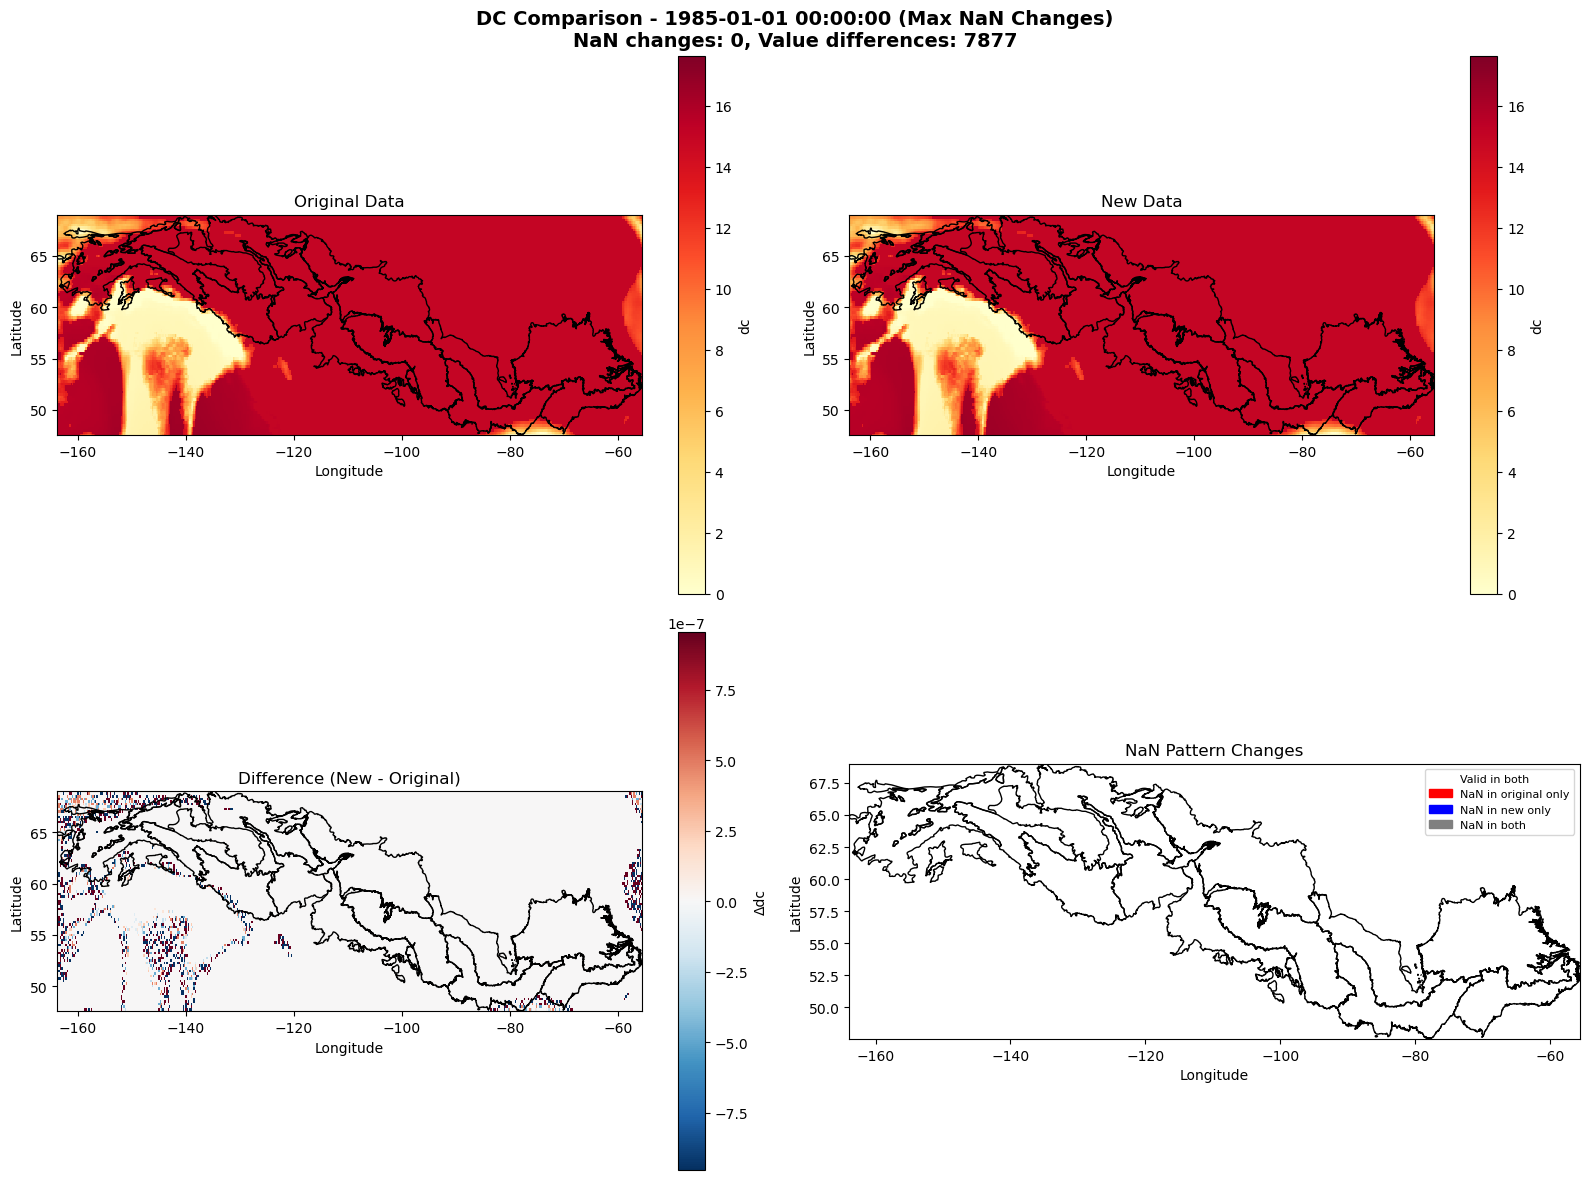

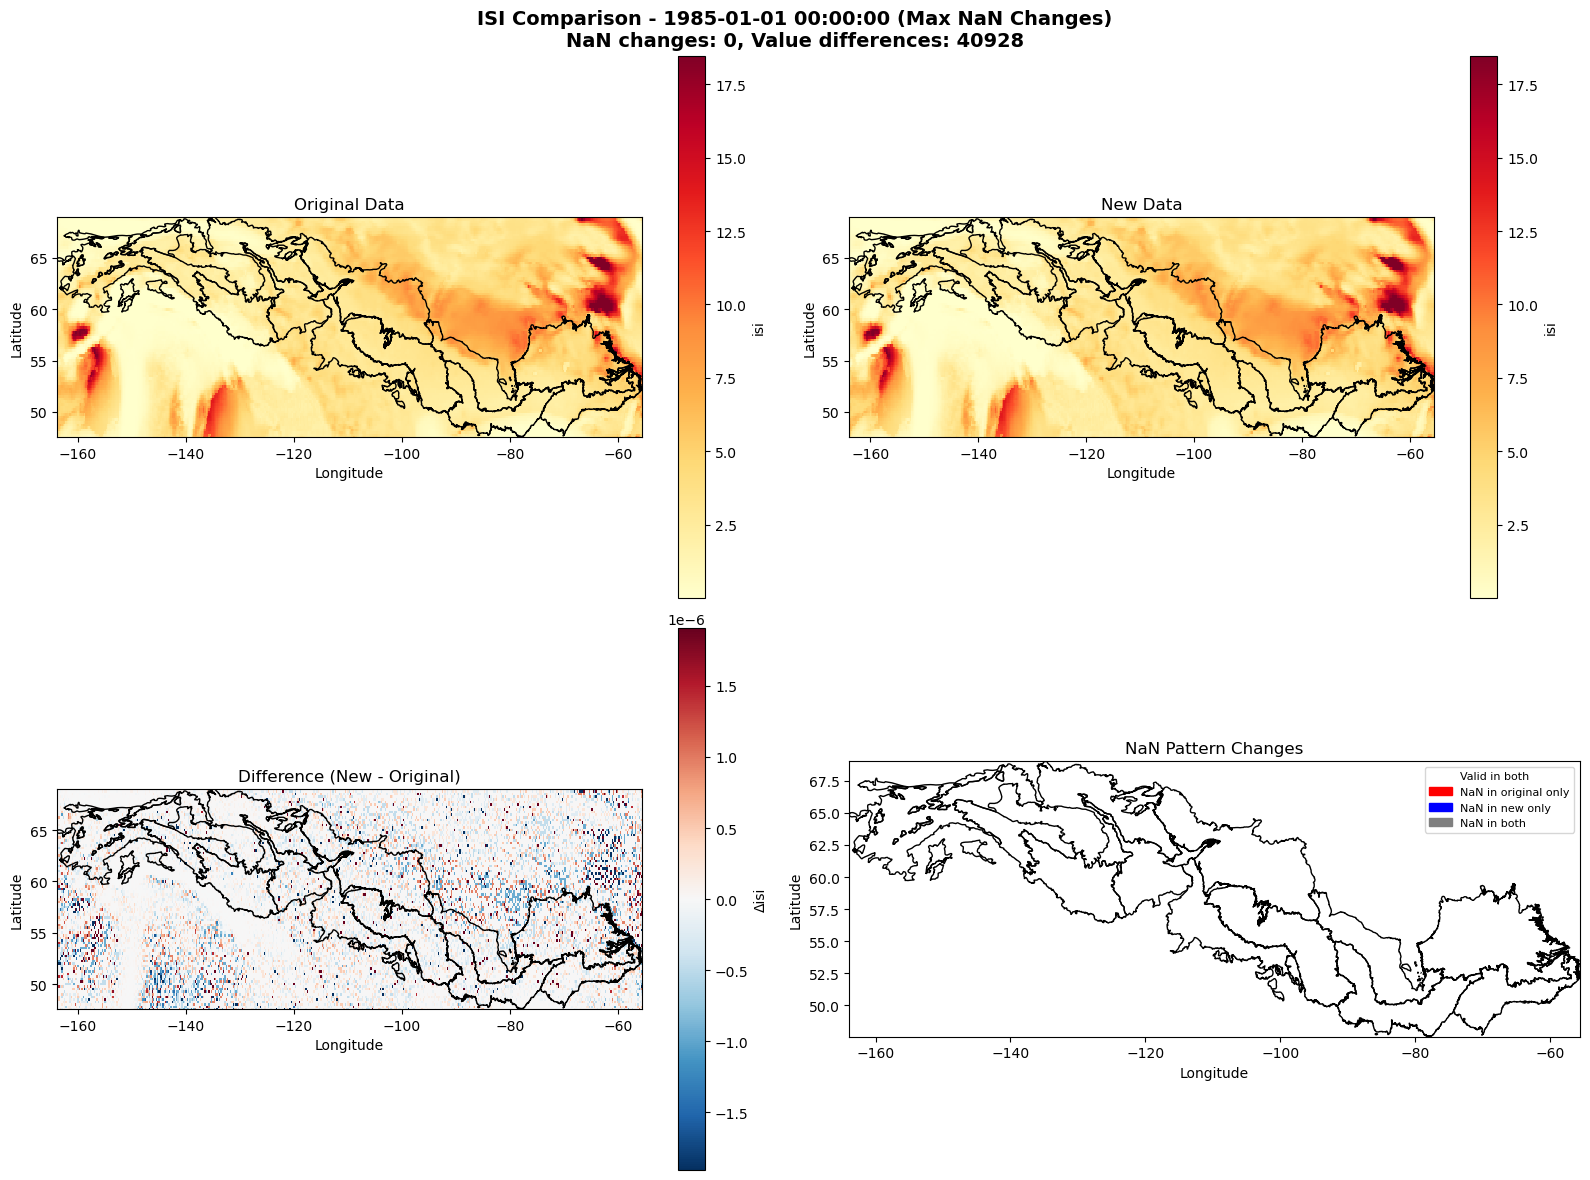

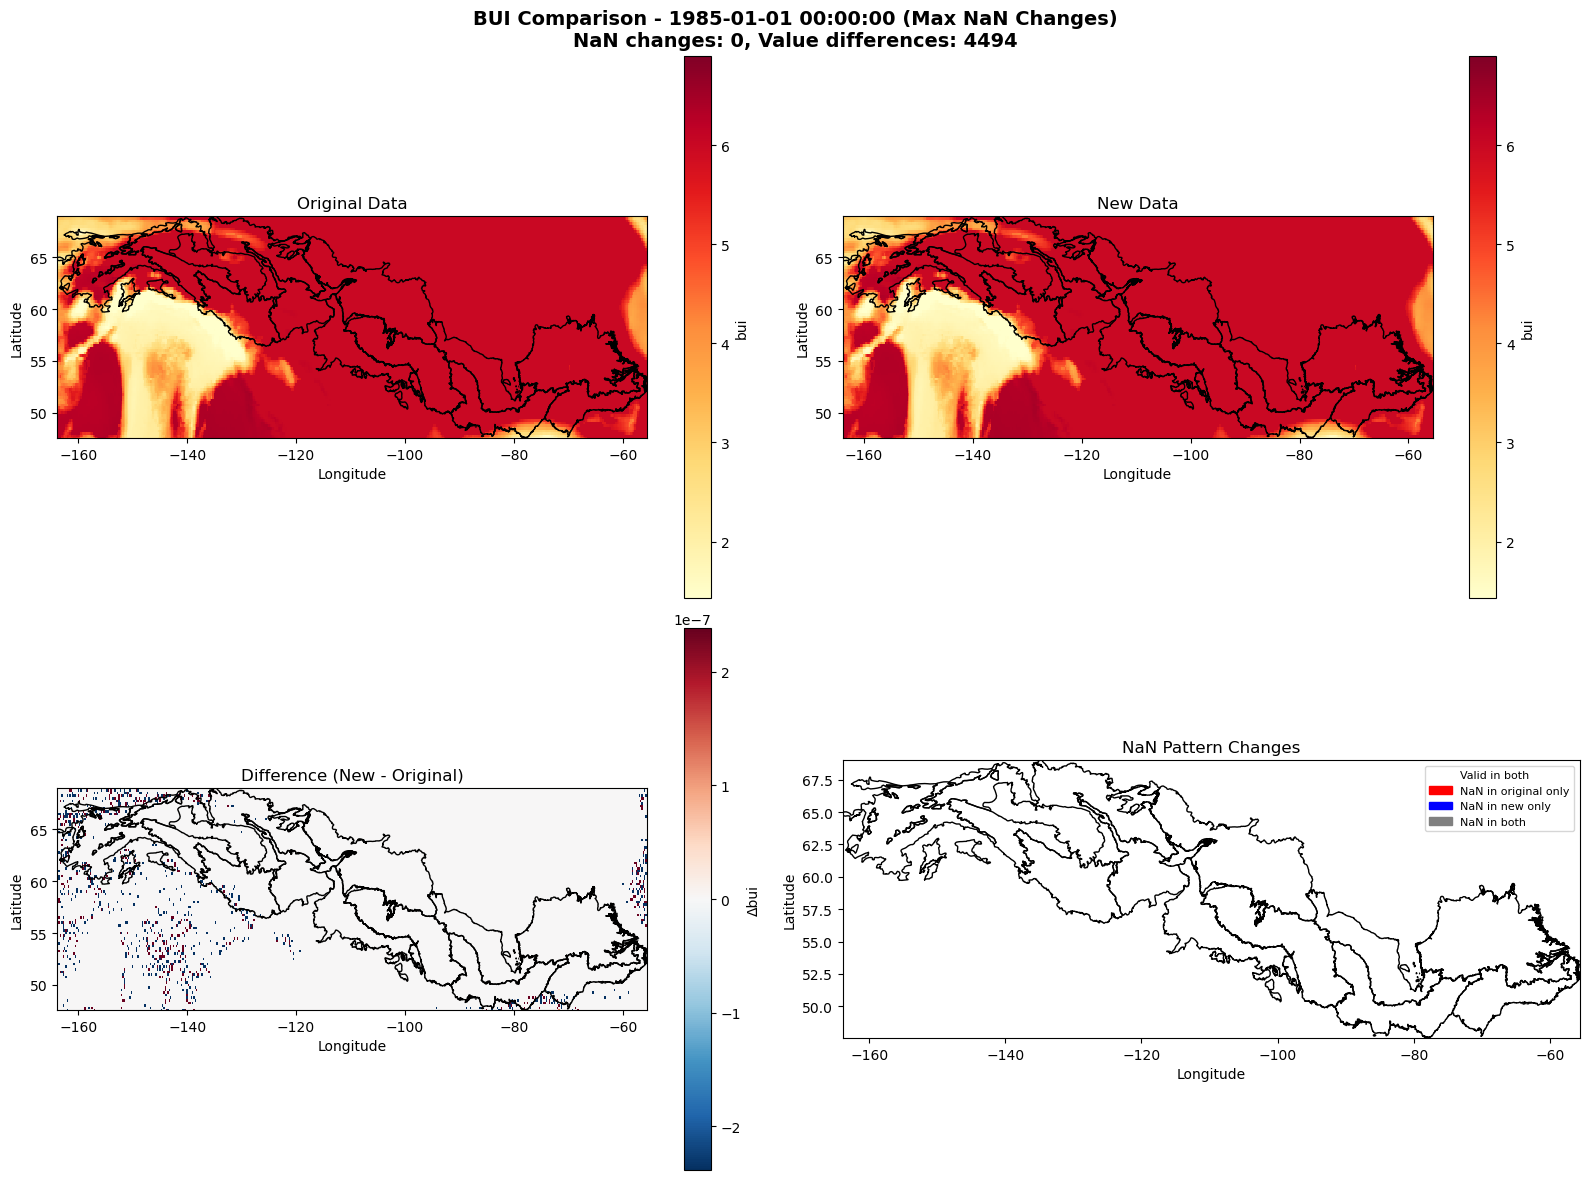

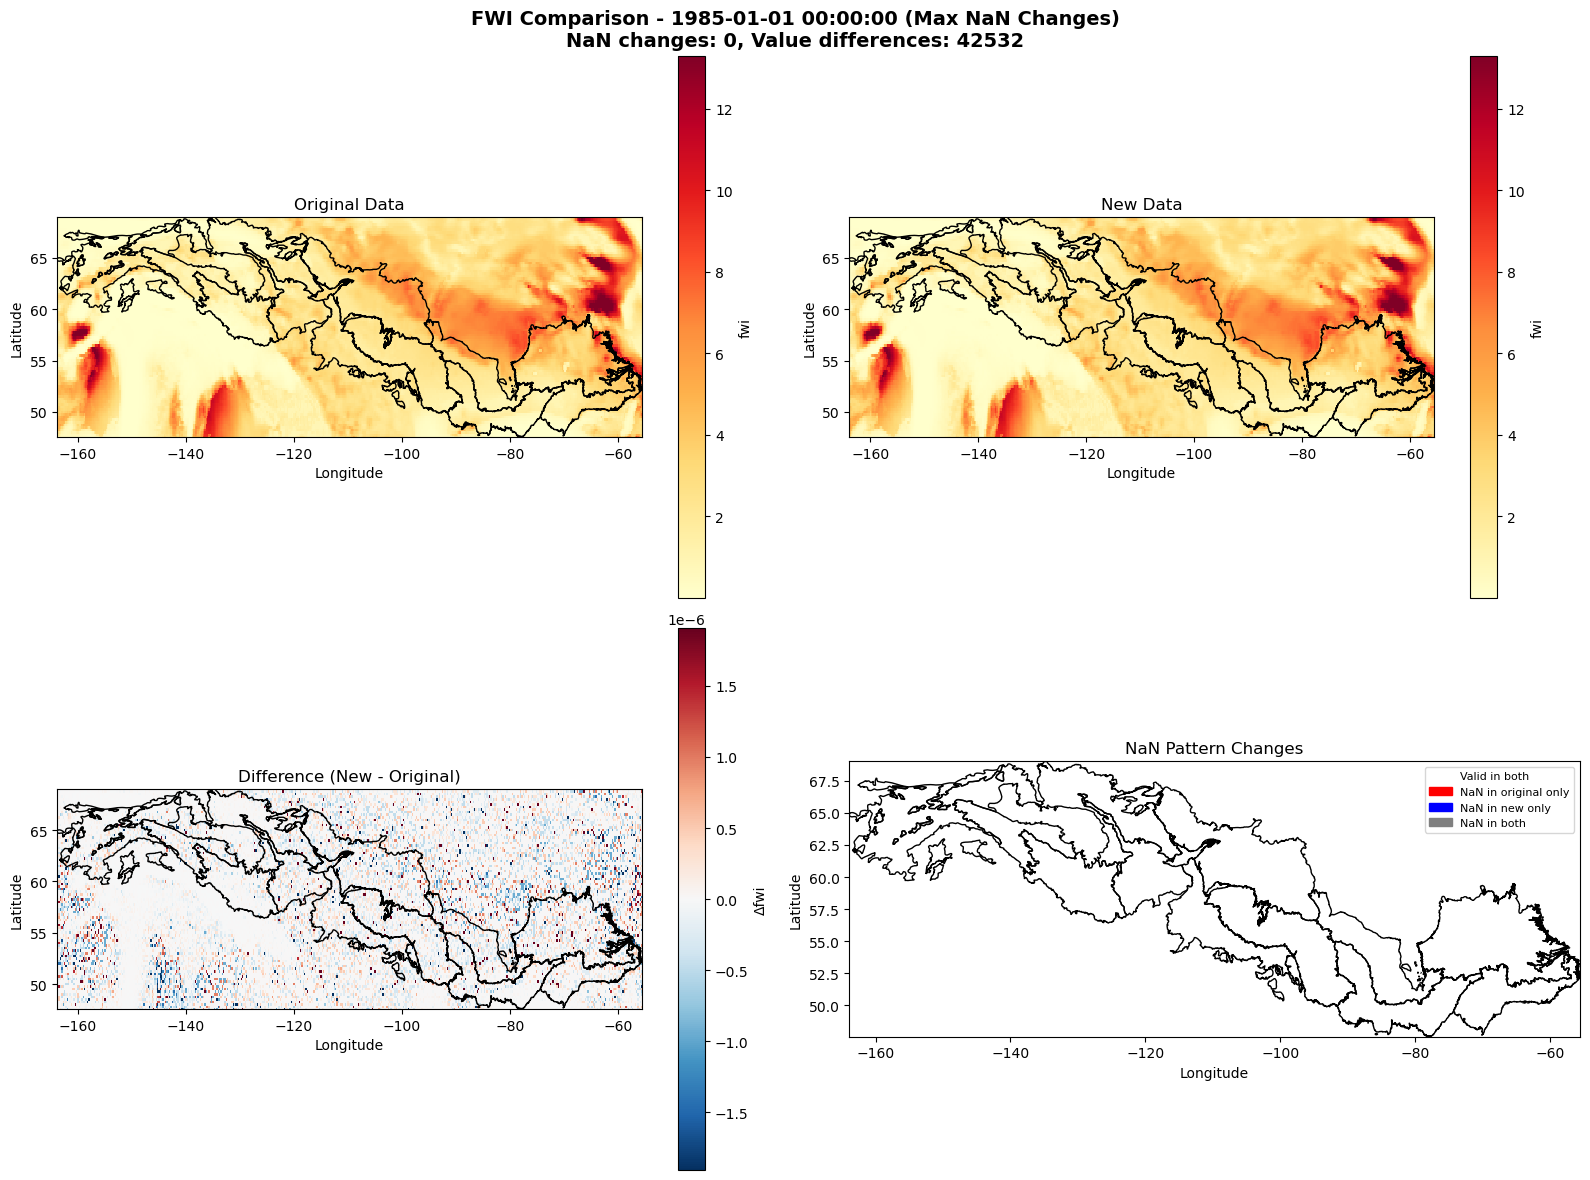

In [8]:
plot_max_nan_differences(ds_ref, ds_new, comparison_results, variables, gdf, bounds)

In [9]:
print(generate_qc_summary(comparison_results, variables))

## QC Summary

### FFMC
- **Total timesteps analyzed:** 365
- **Timesteps with differences:** 365
- ⚠️ **Differences detected**
  - Maximum value difference: 0.000059 on 1985-01-01
  - Maximum NaN changes: 0 cells on 1985-01-01
  - Total value differences: 7760783 across all timesteps
  - Total NaN pattern changes: 0 across all timesteps

### DMC
- **Total timesteps analyzed:** 365
- **Timesteps with differences:** 217
- ⚠️ **Differences detected**
  - Maximum value difference: 0.000031 on 1985-01-01
  - Maximum NaN changes: 0 cells on 1985-01-01
  - Total value differences: 13482 across all timesteps
  - Total NaN pattern changes: 0 across all timesteps

### DC
- **Total timesteps analyzed:** 365
- **Timesteps with differences:** 343
- ⚠️ **Differences detected**
  - Maximum value difference: 0.000061 on 1985-06-27
  - Maximum NaN changes: 0 cells on 1985-01-01
  - Total value differences: 74898 across all timesteps
  - Total NaN pattern changes: 0 across all timesteps

### ISI
- **To

In [10]:
# Clean up
ds_ref.close()
ds_new.close()
print("\nDatasets closed. Analysis complete!")


Datasets closed. Analysis complete!
